# Time Series Analysis using Prophet

<b><p>It works best with daily periodicity data with at least one year of historical data. 
Prophet is robust to missing data, shifts in the trend, and large outliers.</p></b>

In [2]:
import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# installation link to download prophet --- https://facebook.github.io/prophet/docs/installation.html
# prophet by Facebook
from fbprophet import Prophet


In [3]:
df = pd.read_csv("train.csv",low_memory = False)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Time Series Analysis

In [4]:
# remove closed stores and those with no sales
df = df[(df['Open'] != 0) & (df['Sales'] != 0)]

# sales for the store number 2
sales = df[df.Store == 2 ].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [5]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
1014981,2013-01-02,4422
1013866,2013-01-03,4159
1012751,2013-01-04,4484
1011636,2013-01-05,2342
1009406,2013-01-07,6775


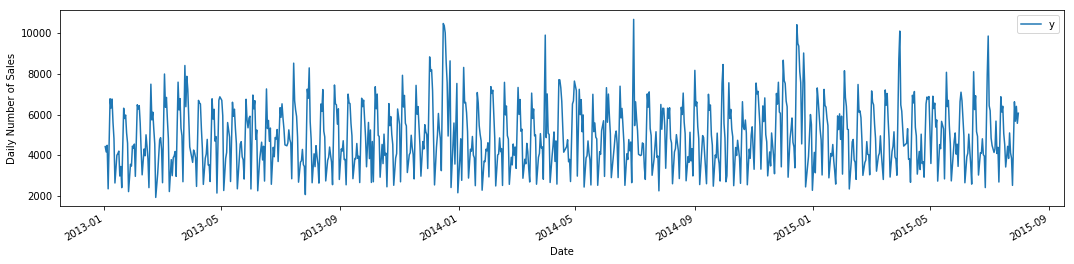

In [6]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (18, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [7]:
#fir the data to the model
m= Prophet()
m.fit(sales)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kanda\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [8]:
# dataframe that extends into future 1 year 
future_dates = m.make_future_dataframe(periods = 365)
#future_dates.head()
future_dates.tail()


,ds
1144,2016-07-26
1145,2016-07-27
1146,2016-07-28
1147,2016-07-29
1148,2016-07-30


In [9]:
# predictions
forecast = m.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1142,2016-07-24,4761.827700,3389.396615,6220.342616
1143,2016-07-25,6066.417232,4617.555451,7534.121714
1144,2016-07-26,5349.987172,3816.714649,6790.459179
1145,2016-07-27,5805.385828,4331.210783,7257.308515
1146,2016-07-28,4933.267905,3415.779134,6339.943561
1147,2016-07-29,4612.410173,3179.481254,6042.661670
1148,2016-07-30,2789.420020,1346.984828,4318.331925


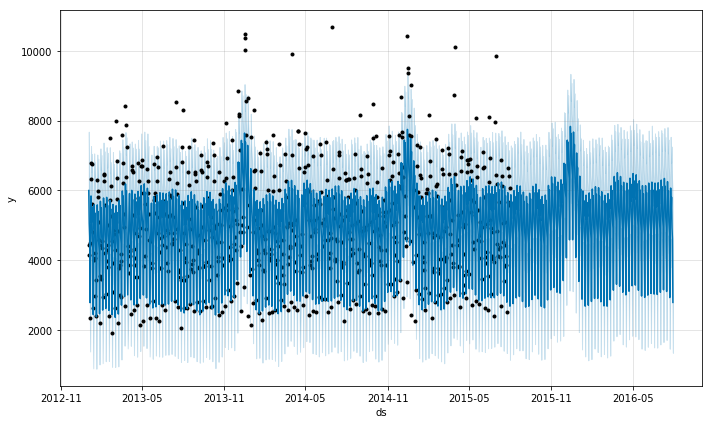

In [10]:
m.plot(forecast);

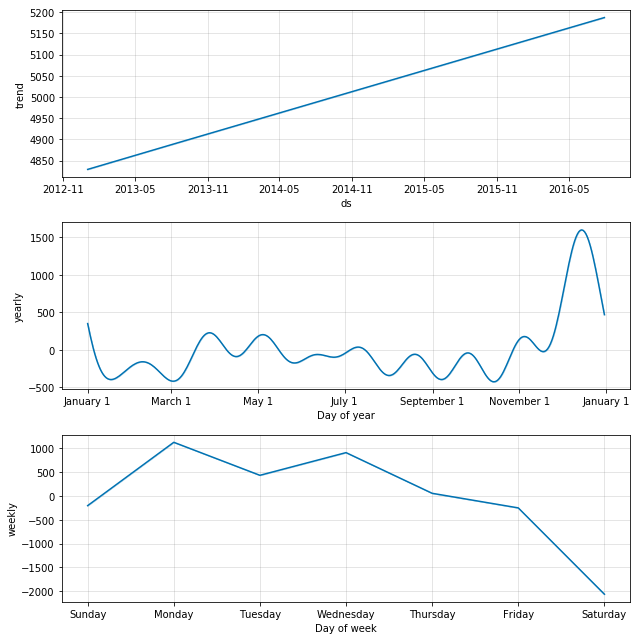

In [11]:
m.plot_components(forecast);

In [12]:
#checking for tends during specific holidays. Also upper_window:1 provides insight on the day just after the holiday
stateHoliday = pd.DataFrame({'holiday': 'state_holiday',
                             'ds': pd.to_datetime(df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') | (df.StateHoliday == 'c')].loc[:, 'Date'].values),
                             'lower_window' : 0,
                             'upper_window' : 1
                            })
stateHoliday.head()

,ds,holiday,lower_window,upper_window
0,2015-06-04,state_holiday,0,1
1,2015-06-04,state_holiday,0,1
2,2015-06-04,state_holiday,0,1
3,2015-06-04,state_holiday,0,1
4,2015-06-04,state_holiday,0,1


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kanda\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


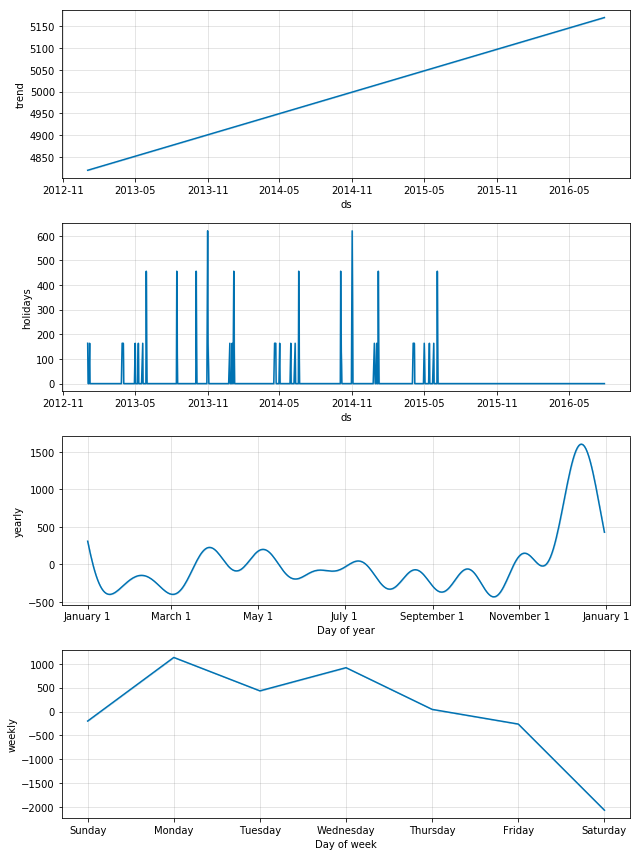

In [14]:
#fiiting the model and checking for all trends
m= Prophet(holidays= stateHoliday)
forecast = m.fit(sales).predict(future_dates)
m.plot_components(forecast);


<h2>References</h2>
<ul>
    <p>Prophet installation document</p>
<li>https://facebook.github.io/prophet/docs/installation.html</li>
    <p>Intoduction to time series using python</p>
<li>https://www.youtube.com/watch?v=95-HMzxsghY</li>
    <p>time series using R</p>
<li>https://blog.exploratory.io/an-introduction-to-time-series-forecasting-with-prophet-package-in-exploratory-129ed0c12112</li>
    <p>Facebook official document on Prophet</p>
<li>https://facebook.github.io/prophet/docs/quick_start.html</li>
</ul>